In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("http://raw.githubusercontent.com/PlainChild/Python-Restaurant-Analysis/refs/heads/main/Restaurant-rating-data.csv",delimiter=';')
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [4]:
df[df.duplicated()]

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)


In [12]:
df["rate"] = df["rate"].str.split("/").str[0].astype(float)
df.head(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


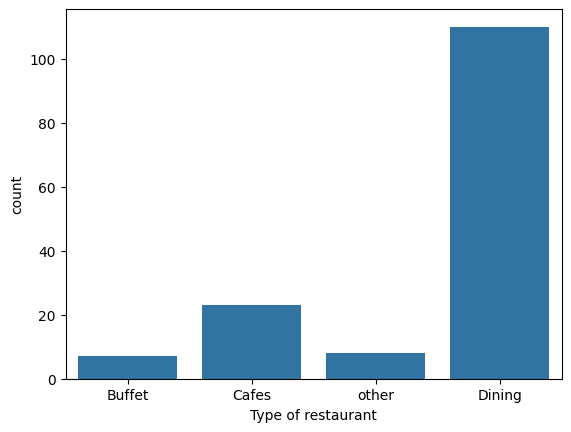

In [28]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

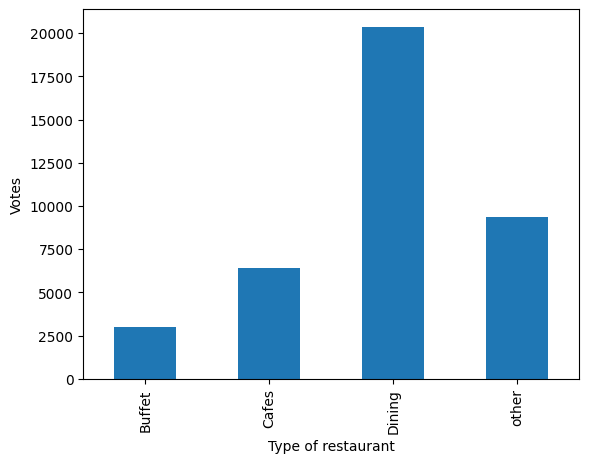

In [88]:
vote_per_type = df.groupby('listed_in(type)')['votes'].sum()
vote_per_type.plot(kind='bar')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')

In [37]:
most_votes = df['votes'].max()
most_votes_rest = df.loc[df['votes'] == most_votes]

most_votes_rest

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
38,Empire Restaurant,Yes,No,4.4,4884,750,other


<Axes: xlabel='online_order', ylabel='count'>

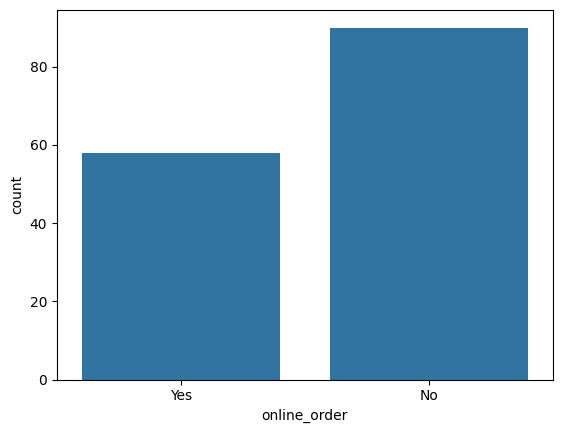

In [54]:
sns.countplot(x=df['online_order'])

Text(0.5, 1.0, 'Ratings Distribution')

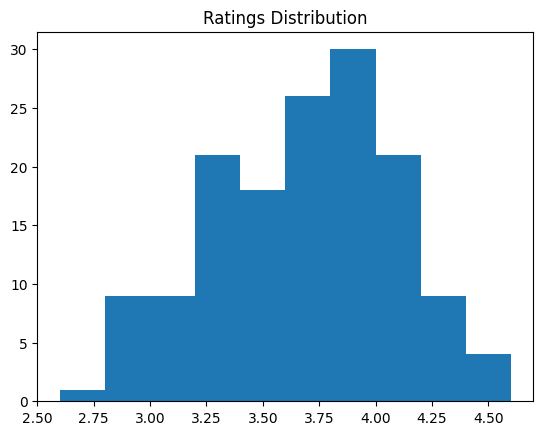

In [72]:
plt.hist(df['rate'])
plt.title('Ratings Distribution')

Text(0, 0.5, 'Number of Popular Restaurants')

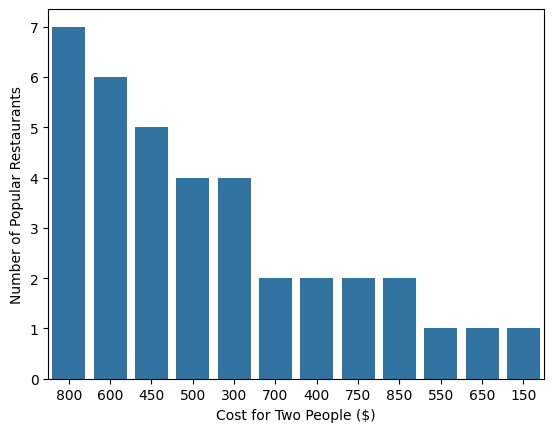

In [81]:
top_25percent = df['votes'].quantile(0.75)
pop_restaurants = df[df['votes'] >= top_25percent]

sns.countplot(
    x=pop_restaurants['approx_cost(for two people)'],
    order=pop_restaurants['approx_cost(for two people)'].value_counts().index)
plt.xlabel("Cost for Two People ($)")
plt.ylabel("Number of Popular Restaurants")

<Axes: xlabel='rate', ylabel='online_order'>

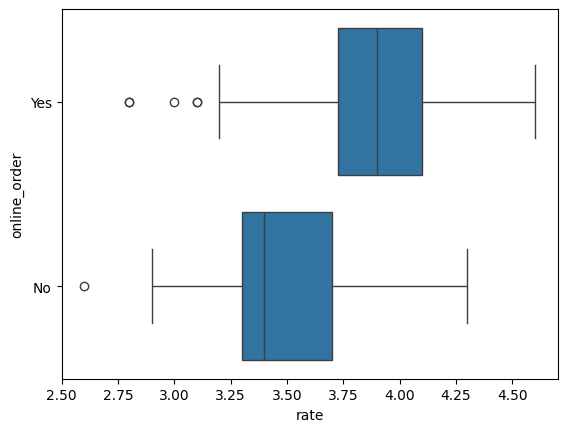

In [51]:
sns.boxplot(x = 'rate', y = 'online_order', data = df)

Text(0.5, 23.52222222222222, 'Restaurant Type')

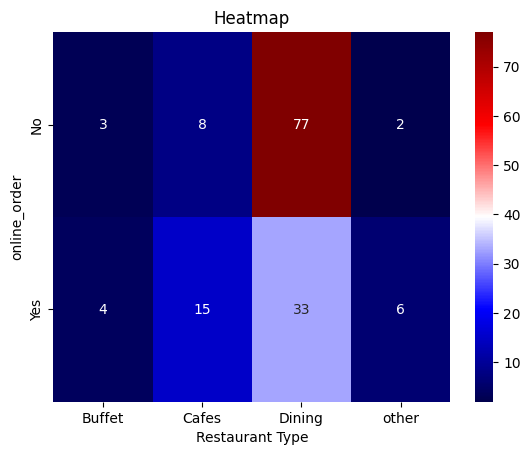

In [68]:
pivot_table = df.pivot_table(index='online_order', columns='listed_in(type)', aggfunc='size')
sns.heatmap(pivot_table, annot=True, cmap='seismic')
plt.title('Heatmap')
plt.xlabel('Restaurant Type')
